In [1]:
using DifferentialEquations, Plots, DelimitedFiles, Flux, DiffEqSensitivity, PGFPlotsX
pgfplotsx()

Plots.PGFPlotsXBackend()

In [2]:
using DifferentialEquations, Plots, DelimitedFiles, Flux

# Define ODE
function EpMod(x, p, t)
    s, e, i, r = x
    γ, R₀, σ = p
    return [-γ*R₀*s*i;       # ds/dt = -γR₀si
             γ*R₀*s*i -  σ*e;# de/dt =  γR₀si -σe
             σ*e - γ*i;      # di/dt =         σe -γi
                   γ*i;      # dr/dt =             γi
            ]
end

#=
N = 10^7 # Population
i_0 = 2000/N                # Initially infected
e_0 = 4.0 * i_0             # Initially exposed
s_0 = 1.0 - i_0 - e_0       # Initially susceptible
r_0 = 0.0                   # Initially recovered
x_0 = [s_0, e_0, i_0, r_0]  # initial state of the system
γ = 1/18
R₀ = 3.0
σ = 1/5.2 
p_0 = [γ,R₀,σ] # parameters
=#
N = 10^7
i_0 = 1E-7                  # 33 = 1E-7 * 330 million population = initially infected
e_0 = 4.0 * i_0             # 132 = 1E-7 *330 million = initially exposed
s_0 = 1.0 - i_0 - e_0
r_0 = 0.0
x_0 = [s_0, e_0, i_0, r_0]  # initial condition
γ = 1/5
R₀ = 3.0
σ = 1/5.2 # parameters
p_0 = [γ,R₀,σ]
p_0 = [0.15989660921114632, 5.652531128901435, 0.11662397475564992]


dat = readdlm("covid.txt",',');
time_i = dat[:,1]; # times
Infected = 50*dat[:,2]/N; # Normalize data
Infected[2:end] = Infected[2:end] 
#scatter(time_i,Infected,label="Infected")


# Solve the problem with an ODE solver
tspan = (0.0, maximum(time_i))  # ≈ 170 days
prob = ODEProblem(EpMod, x_0, tspan, p_0)
sol = solve(prob, Tsit5())
sol2 = solve(prob,Tsit5(),saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 1701-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 168.9
 169.0
 169.1
 169.2
 169.3
 169.4
 169.5
 169.6
 169.7
 169.8
 169.9
 170.0
u: 1701-element Vector{Vector{Float64}}:
 [0.9999995, 4.0e-7, 1.0e-7, 0.0]
 [0.9999994908232233, 4.044858703890165e-7, 1.0306742462789037e-7, 1.6234818076767905e-9]
 [0.9999994813690326, 4.091955271057633e-7, 1.0613939886198652e-7, 3.2960414518388185e-9]
 [0.9999994716368796, 4.1412693111718876e-7, 1.0921841326077872e-7, 5.017775983652505e-9]
 [0.999999461626009, 4.1927826517855474e-7, 1.1230690683410262e-7, 6.7888190451302685e-9]
 [0.9999994513354583, 4.246479338334367e-7, 1.1540726704313948e-7, 8.609340869130618e-9]
 [0.9999994407640586, 4.3023456341372333e-7, 1.1852182980041574e-7, 1.0479548279357976e-8]
 [0.9999994299104339, 4.3603700203961796e-7, 1.2165287946980401e-7, 1.2399684690363191e-8]
 [0.9999994187730015, 4.42054319

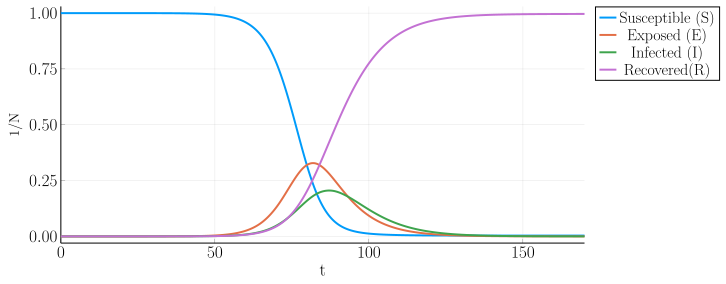

In [3]:
# plot the solution
plot(sol, 
    labels = ["Susceptible (S)" "Exposed (E)" "Infected (I)" "Recovered(R)"], 
    title = "", 
    lw = 2, 
    xlabel = "t",
    ylabel = "1/N",
    size=(800,400),
    dpi=1000,
    xtickfont=font(18),
    ytickfont=font(18),
    yguidefontsize=14,
    xguidefontsize=18,
    legendfontsize=16,
    titlefontsize=18,
    legend=:inside
    )

In [4]:
savefig("SEIR_full.png")